# Neural Network (core)


In [1]:
# Imports
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline



# new libraries
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)




pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings("ignore") 

2023-05-10 00:36:46.451862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def eval_regression(model, X, y, name='model'):
    """Returns a dataframe with regression metrics.  
    optional name variable can be used to name each model and/or dataset used 
    for clarity"""
    score_df = pd.DataFrame(index=[name])
    preds = model.predict(X)
    score_df.loc[name,'MAE'] = mean_absolute_error(y, preds)
    score_df.loc[name,'RMSE'] = np.sqrt(mean_squared_error(y, preds))
    score_df.loc[name,'R2'] = r2_score(y, preds)
    return score_df

def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.drop(columns=['Id','Alley','PoolQC','MSSubClass','GarageQual','3SsnPorch',
                 'ScreenPorch','MiscFeature','MiscVal','LandSlope',
                 'Utilities','BsmtQual','1stFlrSF','2ndFlrSF',
                 'GarageArea'],axis=1,inplace=True)

In [11]:
df['Date'] = df.apply(lambda x: pd.to_datetime(f"{x['YrSold']}-{x['MoSold']}-01"), axis=1)
df.drop(columns=['YrSold','MoSold'])

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,Fence,SaleType,SaleCondition,SalePrice,Date
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,Y,0,61,0,0,NaN,WD,Normal,208500,2008-02-01
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,TA,Y,298,0,0,0,NaN,WD,Normal,181500,2007-05-01
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,TA,Y,0,42,0,0,NaN,WD,Normal,223500,2008-09-01
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,Y,0,35,272,0,NaN,WD,Abnorml,140000,2006-02-01
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,TA,Y,192,84,0,0,NaN,WD,Normal,250000,2008-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,TA,Y,0,40,0,0,NaN,WD,Normal,175000,2007-08-01
1456,RL,85.0,13175,Pave,Reg,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,TA,Y,349,0,0,0,MnPrv,WD,Normal,210000,2010-02-01
1457,RL,66.0,9042,Pave,Reg,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,Y,0,60,0,0,GdPrv,WD,Normal,266500,2010-05-01
1458,RL,68.0,9717,Pave,Reg,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,TA,Y,366,0,112,0,NaN,WD,Normal,142125,2010-04-01


In [12]:
X = df.drop(columns = 'SalePrice')
# Encode our target
y = df['SalePrice']

1. Train Test Split 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

2. Scale

In [14]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

ohe= OneHotEncoder(handle_unknown="ignore",sparse=False)
scaler = StandardScaler()

median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value="missing")

num_pipe = make_pipeline(median_imputer,scaler)
cat_pipe = make_pipeline(constant_imputer,ohe )

number_tuple = (num_pipe, num_selector)
category_tuple = (cat_pipe,cat_selector)

preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop',
                                       verbose_feature_names_out=False)

3. Fit The  Data

In [15]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x128cca3a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x128cca160>)],
                  verbose_feature_names_out=False)

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [17]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [18]:
X_train.shape[1]


262

# Model 1

In [19]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model.add(Dense(10, activation='relu', input_dim=input_dim, name='h1'))
reg_model.add(Dense(10, activation='relu', name='h2'))
# Add output layer with 1 node
reg_model.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 10)                2630      
                                                                 
 h2 (Dense)                  (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0


2023-05-10 00:36:56.930875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


_________________________________________________________________


In [20]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

In [21]:
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=False)



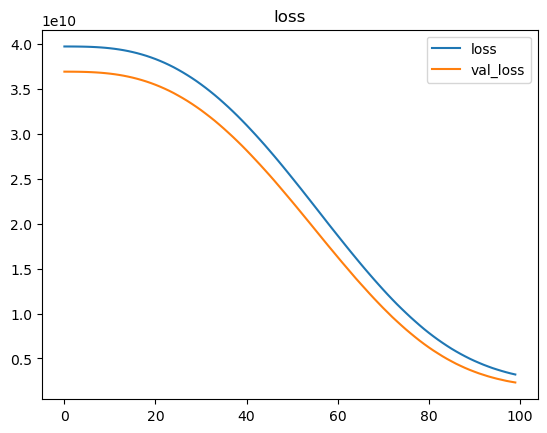

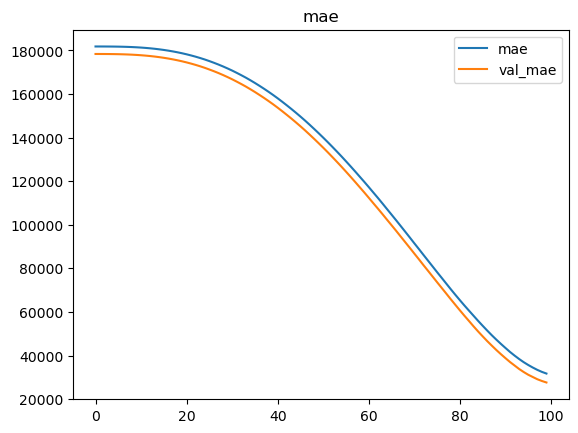

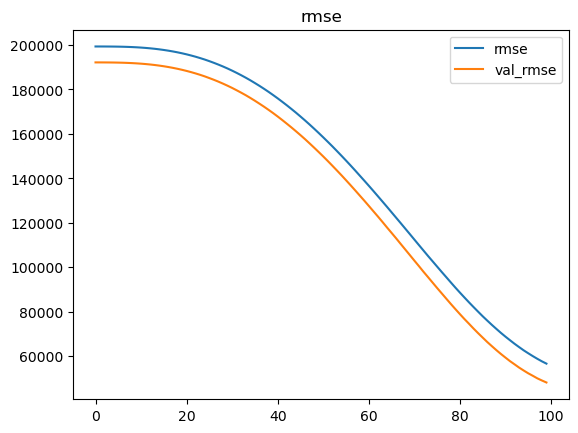

In [22]:
plot_history(history)

In [38]:
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

train_scores = eval_regression(y_train, train_preds, name='Reg_Model')
test_scores = eval_regression(y_test, test_preds, name='Reg_Model')


12/12 [==============================] - 0s 3ms/step
Reg_Model Scores
MAE: 31,355.8444 
MSE: 3,152,869,860.3707 
RMSE: 56,150.4217 
R2: 0.5291

Reg_Model Scores
MAE: 27,628.3470 
MSE: 2,322,602,545.4425 
RMSE: 48,193.3869 
R2: 0.5473



# Model 2

In [24]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model2 = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model2.add(Dense(9, activation='relu', input_dim=input_dim, name='h1'))
reg_model2.add(Dense(6, activation='relu', name='h2'))
reg_model2.add(Dense(8, activation='relu', name='h3'))
# Add output layer with 1 node
reg_model2.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 9)                 2367      
                                                                 
 h2 (Dense)                  (None, 6)                 60        
                                                                 
 h3 (Dense)                  (None, 8)                 56        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 2,492
Trainable params: 2,492
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model2.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

In [26]:
history2 = reg_model2.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=False)


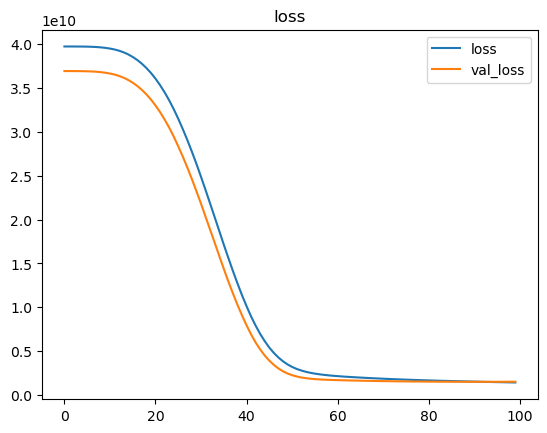

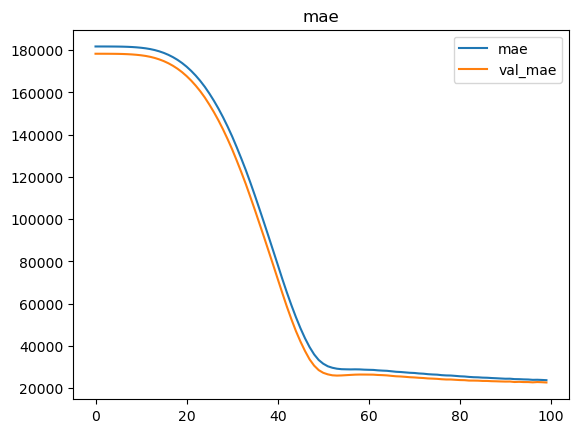

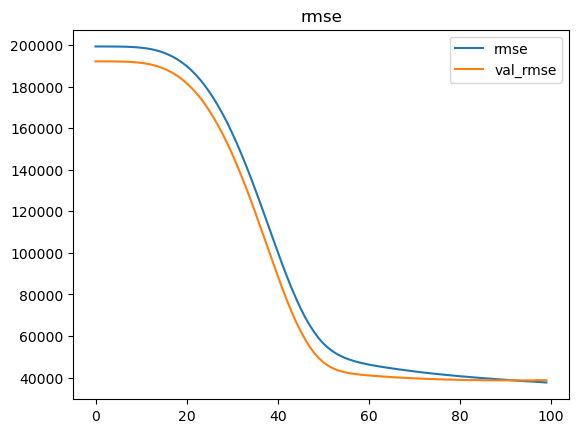

In [27]:
plot_history(history2)

In [39]:
train_preds2 = reg_model2.predict(X_train)
test_preds2 = reg_model2.predict(X_test)

train_scores2 = eval_regression(y_train, train_preds2, name='Reg_Model2')
test_scores2 = eval_regression(y_test, test_preds2, name='Reg_Model2')



12/12 [==============================] - 0s 3ms/step
Reg_Model2 Scores
MAE: 23,674.8409 
MSE: 1,409,958,008.6762 
RMSE: 37,549.4076 
R2: 0.7894

Reg_Model2 Scores
MAE: 22,674.9238 
MSE: 1,497,191,666.6096 
RMSE: 38,693.5610 
R2: 0.7082



# Model 3

In [29]:
# Reset Random seed for consistency
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instantiate your sequential model

reg_model3 = Sequential()
# use all features as input using input_dim
input_dim = X_train.shape[1]

# Add first hidden layer
reg_model3.add(Dense(12, activation='relu', input_dim=input_dim, name='h1'))
reg_model3.add(Dense(9, activation='relu', name='h2'))
reg_model3.add(Dense(10, activation='relu', name='h3'))
# Add output layer with 1 node
reg_model3.add(Dense(1, activation='linear', name ='output'))


# Check summary of network 
reg_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 12)                3156      
                                                                 
 h2 (Dense)                  (None, 9)                 117       
                                                                 
 h3 (Dense)                  (None, 10)                100       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 3,384
Trainable params: 3,384
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile your model.
rmse = RootMeanSquaredError(name='rmse')

reg_model3.compile(optimizer= 'adam', loss = 'mse', metrics= ['mae', rmse])

In [31]:
history3 = reg_model3.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=False)


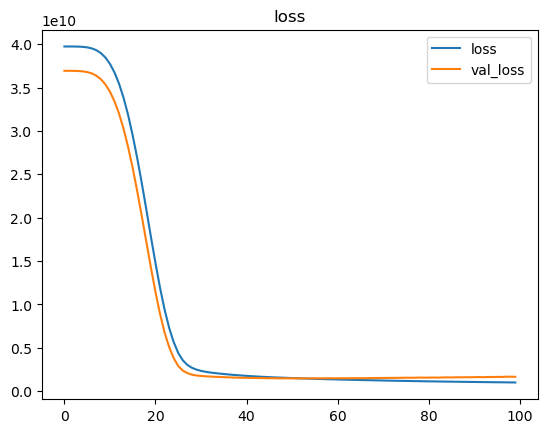

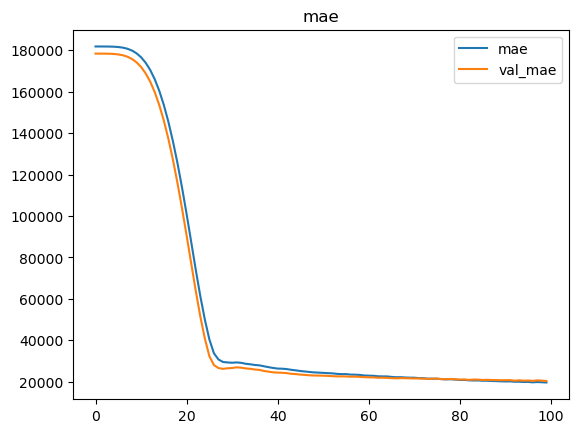

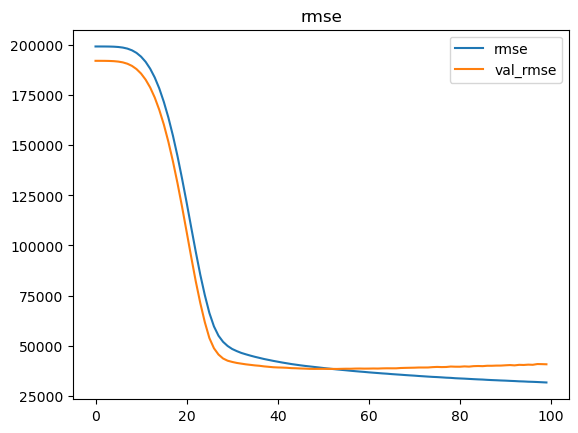

In [32]:
plot_history(history3)

In [40]:
train_preds3 = reg_model3.predict(X_train)
test_preds3 = reg_model3.predict(X_test)

train_scores3 = eval_regression(y_train, train_preds3, name='Reg_Model3')
test_scores3 = eval_regression(y_test, test_preds3, name='Reg_Model3')

12/12 [==============================] - 0s 3ms/step
Reg_Model3 Scores
MAE: 19,576.5312 
MSE: 993,834,632.2995 
RMSE: 31,525.1429 
R2: 0.8516

Reg_Model3 Scores
MAE: 20,392.1082 
MSE: 1,654,661,765.6308 
RMSE: 40,677.5339 
R2: 0.6775



Reg_model3 has the lowest MAE values of 20,392.1082 and 19,576.5312, the lowest MSE values of 1,654,661,765.6308 and 993,834,632.2995, the lowest RMSE values of 40,677.5339 and 31,525.1429, and the highest R2 values of 0.6775 and 0.8516. These results indicate that Reg_model3 outperforms the other models with better accuracy, lower prediction error, and a higher ability to explain the variance in the target variable.